# PRCP-1016-HeartDieseasePred
    
    By: Guiller Fiestada
                           



### Description
Hosted by Drivendata
Predicting Heart Disease
https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/107/

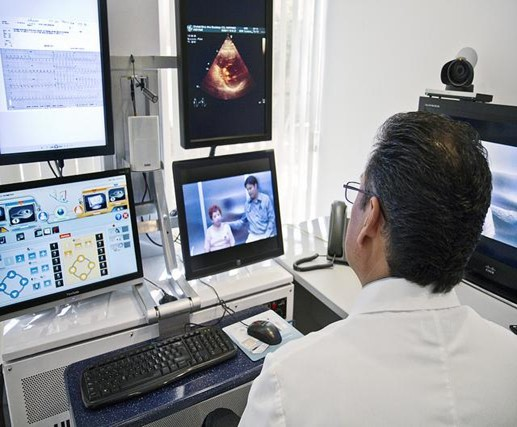
 
Heart disease is the number one cause of death worldwide, so if you're looking to use data science for good you've come to the right place. To learn how to prevent heart disease we must first learn to reliably detect it.
Our dataset is from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.


# 1. Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#model validation
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score ,precision_score , f1_score 
from sklearn.metrics import log_loss,roc_auc_score,roc_curve,auc



# 2. Loading Dataset 

In [2]:
#read the data
heart_d_data  =  pd.read_csv('values.csv')
label = pd.read_csv('labels.csv')

In [3]:
#checking the data information
heart_d_data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
label.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [5]:
#checking shape of the data
heart_d_data.shape


(180, 14)

In [6]:
label.shape

(180, 2)

# 3. Data Cleaning & Preprocessing

In [7]:
#checking missing values

heart_d_data.isnull().sum()


patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [8]:
label.isnull().sum()

patient_id               0
heart_disease_present    0
dtype: int64

In [9]:
#checking unique values of 'thal' column which is encoded in non-numerical data
heart_d_data['thal'].value_counts()


normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [10]:
#converting the thal column into machine codes
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()
thal_cat = heart_d_data['thal']
thal_encoded = lbl_enc.fit_transform(thal_cat)
thal_DF = pd.DataFrame(thal_encoded, columns=['thal_cat'])

In [11]:
#concatenate the thal_cat into the data
new_heart_data = pd.concat([heart_d_data, thal_DF], axis=1)
new_heart_data['thal_cat'].value_counts() #ensuring the data produce the same counts


1    98
2    74
0     8
Name: thal_cat, dtype: int64

In [12]:
#Merge the 2 dataframe 'new_heart_data' as input feature and dataframe 'label' as output
heart_data = pd.merge(new_heart_data, label, on="patient_id", how="outer")
heart_data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_cat,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,1,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,1,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,2,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,2,0


In [13]:
#dropping the uncessary data from the data frame
# -->'patient_id' = not needed for predicting the output
#        and 
# --->'thal' column = replaced and encoded to 'thal_cat' column 

heart_data.drop(['patient_id','thal' ], axis=1, inplace=True)

In [14]:
#checking the data again
heart_data.head(10)


,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_cat,heart_disease_present
0,1,128,2,0,0,2,308,0.0,1,45,170,0,1,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,1,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1,1
3,1,152,4,0,0,0,223,0.0,1,40,181,0,2,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,2,0
5,1,130,3,0,0,0,180,0.0,1,42,150,0,1,0
6,2,150,4,2,0,2,258,2.6,0,60,157,0,2,1
7,2,150,4,1,0,2,276,0.6,1,57,112,1,0,1
8,3,170,4,0,0,2,326,3.4,1,59,140,1,2,1
9,2,120,3,0,0,0,219,1.6,0,50,158,0,1,0


In [15]:
#checking again if there are missing data
heart_data.isnull().sum()

slope_of_peak_exercise_st_segment       0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
thal_cat                                0
heart_disease_present                   0
dtype: int64

# 4. Exploratory Data Analysis (EDA)

In [16]:
#checking statistical information of the cleaned dataset
heart_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


### Distribution of Heart disease (heart_disease_present variable)

In [17]:
#checking the distribution of the output variable
heart_data.groupby("heart_disease_present").agg({'heart_disease_present': 'count'})

,heart_disease_present
heart_disease_present,
0,100
1,80


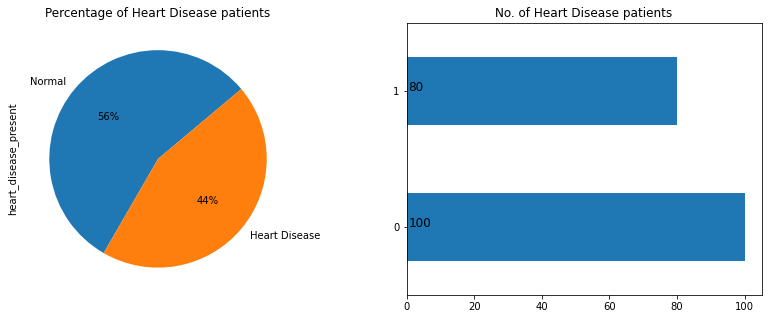

In [18]:
# Plotting distribution of the output variable 

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,5))

ax1 = heart_data["heart_disease_present"].value_counts().plot.pie( x="Heart Disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Normal","Heart Disease"], startangle = 40,ax=ax1);
ax1.set(title = 'Percentage of Heart Disease patients')

ax2 = heart_data["heart_disease_present"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(heart_data["heart_disease_present"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart Disease patients')
plt.show()


1 - with Heart Disease    
0 - Normal or no Heart Disease

The dataset is balanced having 80 heart disease patients and 100 normal patients

### Checking Gender & Age Distribution

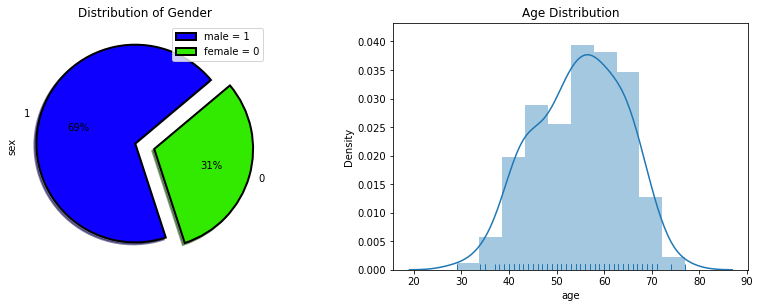

In [19]:
plt.figure(figsize=(14,10))
plt.subplot(221)
heart_data["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 40,
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.legend(['male = 1', 'female = 0'])
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(heart_data['age'], rug=True)
plt.title("Age Distribution")
plt.show()

As we can see from above plot, in this dataset males percentage is way too higher than females where as average age of patients is around 55.

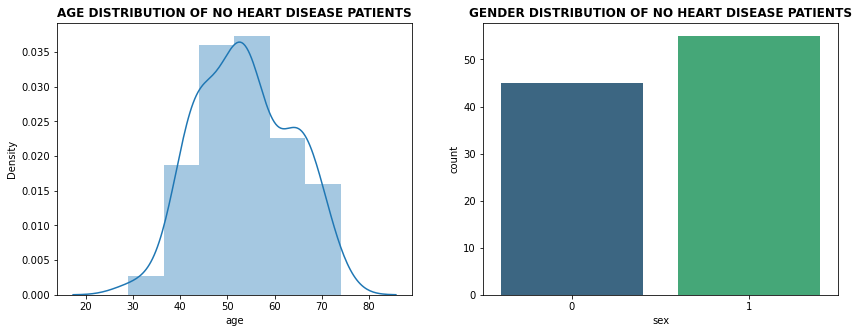

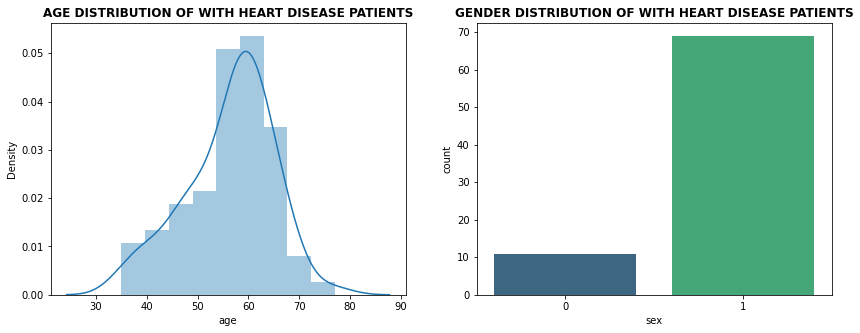

In [20]:
# creating separate df for no heart disease and with heart disease patients
positive=heart_data[heart_data['heart_disease_present']==1]

normal=heart_data[heart_data['heart_disease_present']==0]

# plotting no heart disease patients
fig = plt.figure(figsize=(14,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(normal['age'])
plt.title('AGE DISTRIBUTION OF NO HEART DISEASE PATIENTS', fontsize=12, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(normal['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NO HEART DISEASE PATIENTS', fontsize=12, weight='bold' )
plt.show()

#plotting those with heart disease patients

fig = plt.figure(figsize=(14,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(positive['age'])
plt.title('AGE DISTRIBUTION OF WITH HEART DISEASE PATIENTS', fontsize=12, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(positive['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF WITH HEART DISEASE PATIENTS', fontsize=12, weight='bold' )
plt.show()

As we can see from above plot, Most patients with heart disease are Male in comparison to females whereas average age for heart disease patients is around 57 to 62 years old

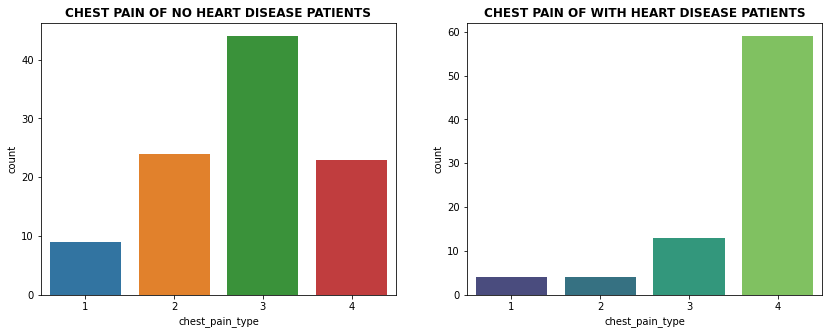

In [21]:
# Checking Distribution of Chest Pain Type

# plotting no heart disease patients
fig = plt.figure(figsize=(14,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(normal['chest_pain_type'])
plt.title('CHEST PAIN OF NO HEART DISEASE PATIENTS', fontsize=12, weight='bold')

#plotting those with heart disease patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(positive['chest_pain_type'], palette='viridis')
plt.title('CHEST PAIN OF WITH HEART DISEASE PATIENTS', fontsize=12, weight='bold' )
plt.show()

In [22]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['chest_pain_type', 'heart_disease_present']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(heart_data[plot_criteria[0]], heart_data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

heart_disease_present,0,1
chest_pain_type,,
1,9.000000,5.000000
2,24.000000,5.000000
3,44.000000,16.250000
4,23.000000,73.750000


As we can see on the above figure, Chest Pain Type 4 has the highest patient with heart disease having 74%.

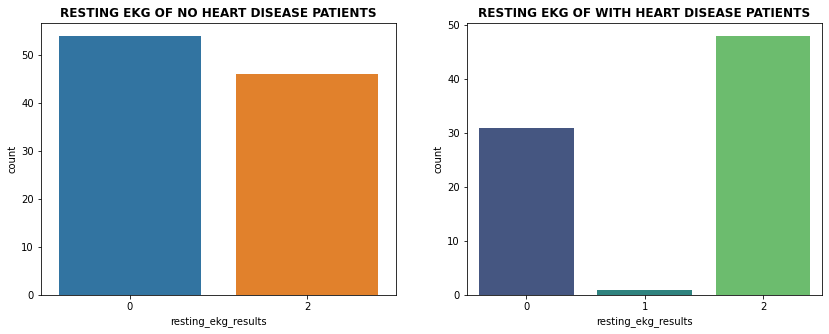

In [23]:
#Checking the Distribution of Resting EKG

# plotting no heart disease patients
fig = plt.figure(figsize=(14,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(normal['resting_ekg_results'])
plt.title('RESTING EKG OF NO HEART DISEASE PATIENTS', fontsize=12, weight='bold')

#plotting those with heart disease patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(positive['resting_ekg_results'], palette='viridis')
plt.title('RESTING EKG OF WITH HEART DISEASE PATIENTS', fontsize=12, weight='bold' )
plt.show()

In [24]:
#Exploring the Heart Disease patients based on REST EKG
plot_criteria= ['resting_ekg_results', 'heart_disease_present']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(heart_data[plot_criteria[0]], heart_data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

heart_disease_present,0,1
resting_ekg_results,,
0,54.000000,38.750000
1,0.000000,1.250000
2,46.000000,60.000000


As Shown in the data above, 60% of Heart Disease patients has Resting EKG results type 2

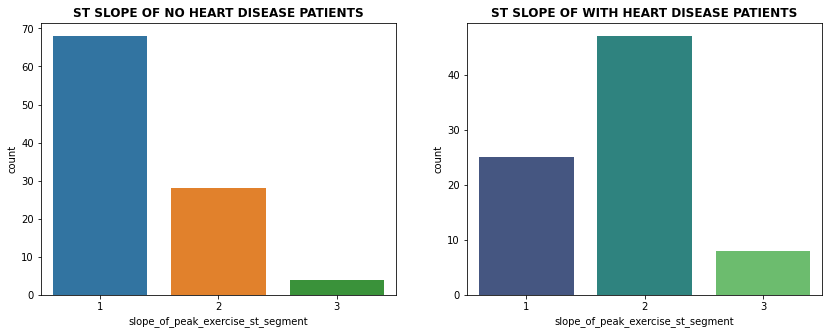

In [25]:
#Checking the distribution of the slope_of_peak_exercise_st_segment of no heart disease and with heart disease patinets

# plotting no heart disease patients
fig = plt.figure(figsize=(14,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(normal['slope_of_peak_exercise_st_segment'])
plt.title('ST SLOPE OF NO HEART DISEASE PATIENTS', fontsize=12, weight='bold')

#plotting those with heart disease patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(positive['slope_of_peak_exercise_st_segment'], palette='viridis')
plt.title('ST SLOPE OF WITH HEART DISEASE PATIENTS', fontsize=12, weight='bold' )
plt.show()

In [26]:
#Exploring the Heart Disease patients based on Slope of peak exercise ST segment
plot_criteria= ['slope_of_peak_exercise_st_segment', 'heart_disease_present']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(heart_data[plot_criteria[0]], heart_data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

heart_disease_present,0,1
slope_of_peak_exercise_st_segment,,
1,68.000000,31.250000
2,28.000000,58.750000
3,4.000000,10.000000


As we can see from above data, 68% of the no heart disease patients have slope type 1 where as 58% heart disease patients have slope type 2.

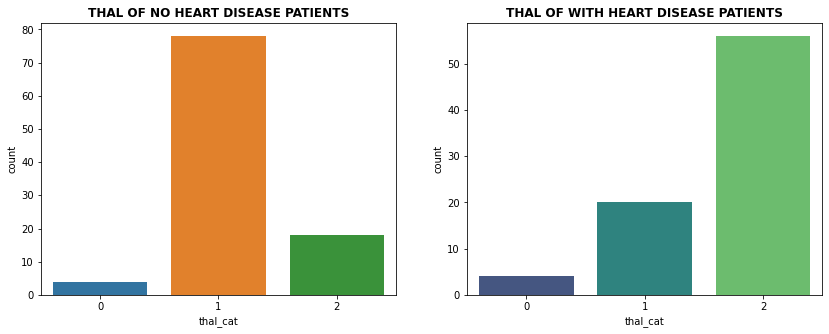

In [27]:
#Checking the distribution of the thal categorical data of no heart disease and with heart disease patinets

# plotting no heart disease patients
fig = plt.figure(figsize=(14,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(normal['thal_cat'])
plt.title('THAL OF NO HEART DISEASE PATIENTS', fontsize=12, weight='bold')

#plotting those with heart disease patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(positive['thal_cat'], palette='viridis')
plt.title('THAL OF WITH HEART DISEASE PATIENTS', fontsize=12, weight='bold' )
plt.show()

In [28]:
#Exploring the Heart Disease patients based on thal
plot_criteria= ['thal_cat', 'heart_disease_present']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(heart_data[plot_criteria[0]], heart_data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

heart_disease_present,0,1
thal_cat,,
0,4.000000,5.000000
1,78.000000,25.000000
2,18.000000,70.000000


Based on Label Encoder:  
0 - fixed_defect  
1 - normal  
2 - reversible_defect  

From the figure above, 72% of heart disease patient has reversible defect thal

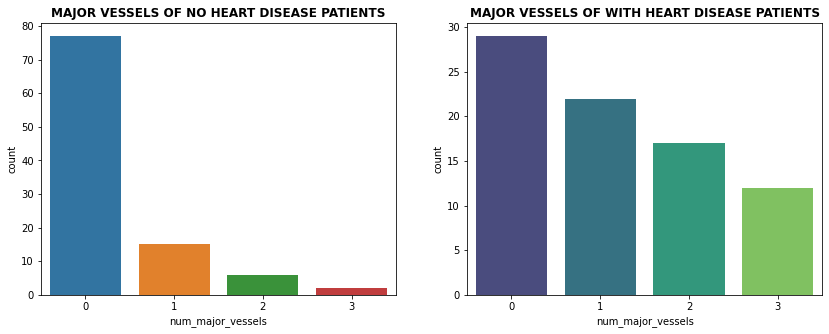

In [29]:
#Checking the distribution of the number of major vessel data of no heart disease and with heart disease patients 

# plotting no heart disease patients
fig = plt.figure(figsize=(14,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(normal['num_major_vessels'])
plt.title('MAJOR VESSELS OF NO HEART DISEASE PATIENTS', fontsize=12, weight='bold')

#plotting those with heart disease patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(positive['num_major_vessels'], palette='viridis')
plt.title('MAJOR VESSELS OF WITH HEART DISEASE PATIENTS', fontsize=12, weight='bold' )
plt.show()

In [30]:
#Exploring the Heart Disease patients based on the number of major vessels
plot_criteria= ['num_major_vessels', 'heart_disease_present']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(heart_data[plot_criteria[0]], heart_data[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

heart_disease_present,0,1
num_major_vessels,,
0,77.000000,36.250000
1,15.000000,27.500000
2,6.000000,21.250000
3,2.000000,15.000000


Based of the data above, the number of major vessels category "0" has the highest percentage in both no heart disease and with heart disease patients

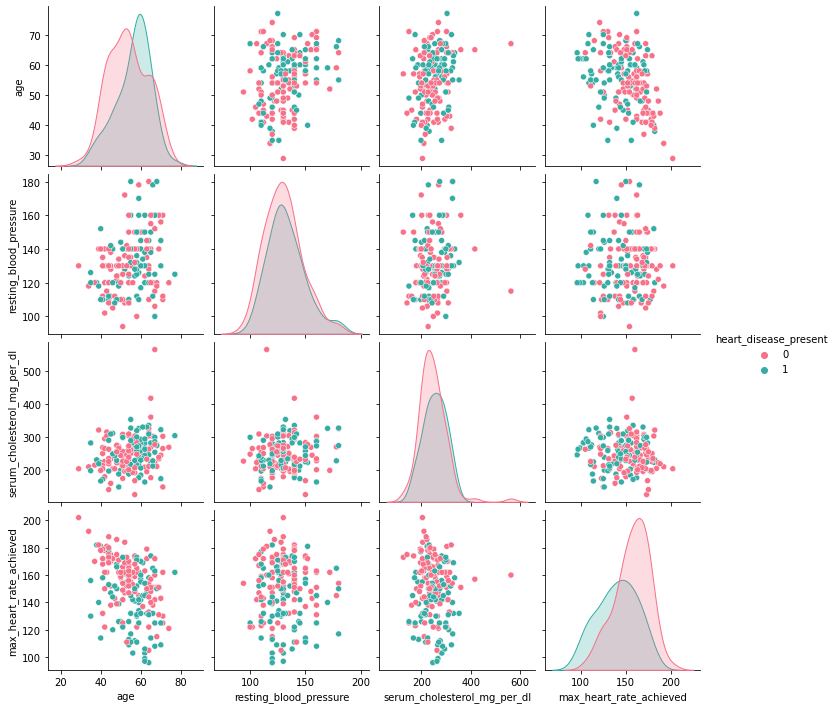

In [31]:
#checking the distribution and relationship of other numerical input variable
sns.pairplot(heart_data, hue = 'heart_disease_present', palette = 'husl', vars = ['age', 'resting_blood_pressure', 'serum_cholesterol_mg_per_dl','max_heart_rate_achieved'] ) 

Based from the above plot, we can see that as the age increases chances of getting heart disease increases.   

We can also see that there are some outliers in the data 

<AxesSubplot:>

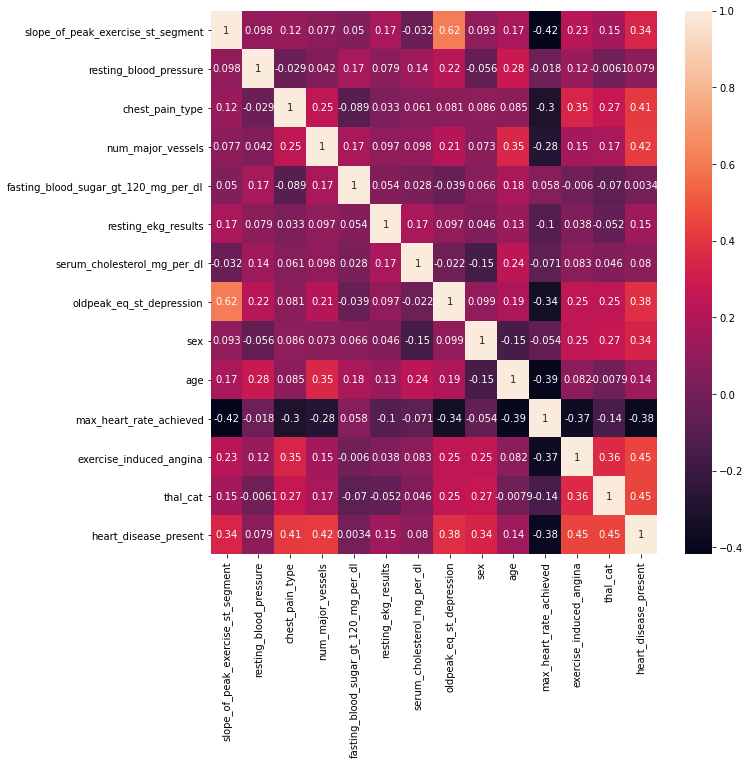

In [32]:
#checking the correlation of each variables

plt.figure(figsize=(10,10))  
sns.heatmap(heart_data.corr(), annot=True)     

# 5. Outlier Detection 

In [33]:
# filtering numeric features as age , resting bp, serum cholestrol and max heart rate achieved has outliers as per EDA

heart_out = heart_data[['age', 'resting_blood_pressure', 'serum_cholesterol_mg_per_dl','max_heart_rate_achieved']]
heart_out.head()

,age,resting_blood_pressure,serum_cholesterol_mg_per_dl,max_heart_rate_achieved
0,45,128,308,170
1,54,110,214,158
2,77,125,304,162
3,40,152,223,181
4,59,178,270,145


In [34]:
# calculating zscore of numerical variables columns in the dataset

from scipy import stats

z = np.abs(stats.zscore(heart_out))

# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([43, 60], dtype=int64), array([2, 2], dtype=int64))


There are only 2 data points which are outliers. So it safe to assume that these are tolerable.

In [35]:
#splitting the data
x  =  heart_data.drop('heart_disease_present', axis =1)
y  = heart_data['heart_disease_present']

# 6. Train Test Split

In [36]:
#split into train and test test
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  stratify=y, random_state=2)

In [37]:
#preprocessing the data
# feature scaling

from sklearn.preprocessing import StandardScaler

scaler =   StandardScaler() 

X_train  =  scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)  


# 7. Building a Model

In [38]:
#creating function for accuracy score and confusion matrix

def accuracy_and_cofusion_matrix(model, x, y):
    cm = confusion_matrix(y,model.predict(x))
    sns.heatmap(cm,annot=True,fmt="d")
    test_acc = accuracy_score(y,model.predict(x))
    prec = precision_score(y, model.predict(x))
    rec = recall_score(y, model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('test accuracy: ', test_acc)
    print("precision: ", prec)
    print("recall:" , rec)
    print('f1 score: ', f_score)    
    print ("\n")
    
    return 


### Using Logistic Regression

In [39]:

from sklearn.linear_model import LogisticRegression 

LogReg_heart_data = LogisticRegression() 
LogReg_data = LogReg_heart_data.fit(X_train, y_train)

LogReg_y_pred = LogReg_heart_data.predict(X_test)

test accuracy:  0.8611111111111112
precision:  0.8666666666666667
recall: 0.8125
f1 score:  0.8387096774193549




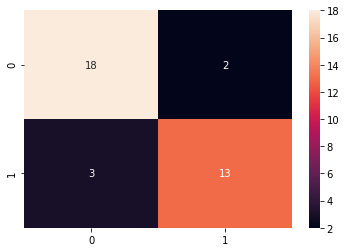

In [40]:
# checking the accuracy
accuracy_and_cofusion_matrix(LogReg_data,X_test, y_test)

### Using SVM

In [41]:
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC


In [42]:
svm_heart_data = SVC(kernel='linear', gamma='auto',probability=True)
svm_data= svm_heart_data.fit(X_train,y_train)

svm_y_pred = svm_heart_data.predict(X_test)

test accuracy:  0.8055555555555556
precision:  0.7647058823529411
recall: 0.8125
f1 score:  0.787878787878788




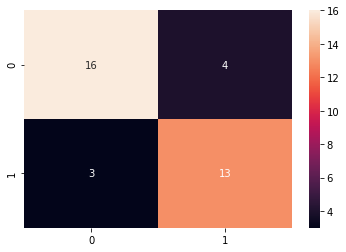

In [43]:
# checking the accuracy
accuracy_and_cofusion_matrix(svm_data,X_test, y_test)

### Using ANN MLPClassifier

In [44]:
from sklearn.neural_network import MLPClassifier
MLPC_heart_data = MLPClassifier( hidden_layer_sizes=(100,2),
                       learning_rate_init=0.1,
                       max_iter=100,
                       random_state=2) 

MLPC_data = MLPC_heart_data.fit(X_train,y_train)

MLPC_y_pred = MLPC_heart_data.predict(X_test)

test accuracy:  0.6666666666666666
precision:  0.5909090909090909
recall: 0.8125
f1 score:  0.6842105263157896




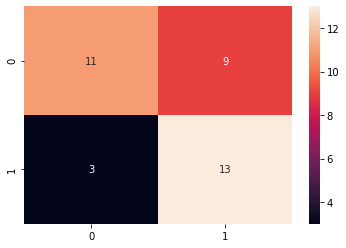

In [45]:
# checking the accuracy
accuracy_and_cofusion_matrix(MLPC_data,X_test, y_test)

### Using Decision Tree Clasifier

In [46]:
#criterion = Gini

from sklearn.tree import DecisionTreeClassifier
DTC_G_heart_data  = DecisionTreeClassifier(criterion = 'gini')
DTC_G_data = DTC_G_heart_data.fit(X_train , y_train)

DTC_G_y_pred = DTC_G_heart_data.predict(X_test)

test accuracy:  0.6944444444444444
precision:  0.6470588235294118
recall: 0.6875
f1 score:  0.6666666666666667




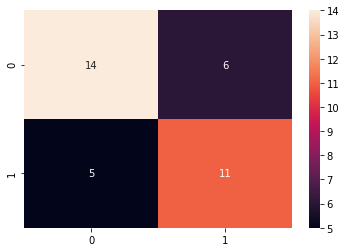

In [47]:
# checking the accuracy

accuracy_and_cofusion_matrix(DTC_G_data,X_test, y_test)

In [48]:
#criterion = entropy

DTC_E_heart_data  = DecisionTreeClassifier(criterion = 'entropy')
DTC_E_data = DTC_E_heart_data.fit(X_train , y_train)

DTC_E_y_pred = DTC_G_heart_data.predict(X_test)

test accuracy:  0.6666666666666666
precision:  0.6111111111111112
recall: 0.6875
f1 score:  0.6470588235294118




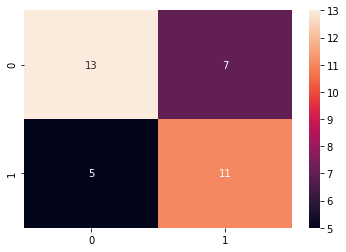

In [49]:
# checking the accuracy

accuracy_and_cofusion_matrix(DTC_E_data,X_test, y_test)

### Using Random Forest Classifier 

In [50]:
#criterion = Gini

from sklearn.ensemble import RandomForestClassifier

RF_G_heart_data  = RandomForestClassifier(criterion='gini', random_state=20 , max_depth= 2 , n_estimators =100)
RF_G_data = RF_G_heart_data.fit(X_train , y_train)

RF_G_y_pred = RF_G_heart_data.predict(X_test)

test accuracy:  0.8611111111111112
precision:  0.9230769230769231
recall: 0.75
f1 score:  0.8275862068965517




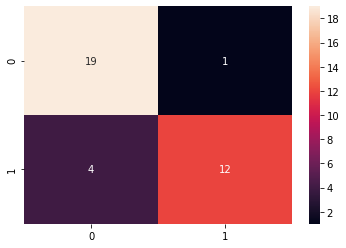

In [51]:
# checking the accuracy

accuracy_and_cofusion_matrix(RF_G_data,X_test, y_test)

In [52]:
#criterion = Entropy

from sklearn.ensemble import RandomForestClassifier

RF_E_heart_data  = RandomForestClassifier(criterion='entropy', random_state=20 , max_depth= 2 , n_estimators =100)
RF_E_data = RF_E_heart_data.fit(X_train , y_train)

RF_E_y_pred = RF_E_heart_data.predict(X_test)

test accuracy:  0.8333333333333334
precision:  0.8571428571428571
recall: 0.75
f1 score:  0.7999999999999999




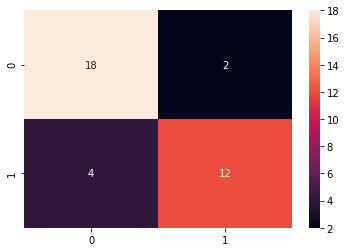

In [53]:
# checking the accuracy

accuracy_and_cofusion_matrix(RF_E_data,X_test, y_test)

### Using KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

k_range=range(1,26)
scores={}
h_score = 0       # to find the best score
best_k=0          # to find the best k
scores_list=[]  

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(y_test,prediction_knn))
print('The best value of k is {} with score : {}'.format(best_k,h_score))

The best value of k is 18 with score : 0.8888888888888888


In [55]:
KNN_heart_data=KNeighborsClassifier(n_neighbors=best_k)
KNN_data = KNN_heart_data.fit(X_train,y_train)

KNN_y_pred = KNN_heart_data.predict(X_test)

test accuracy:  0.8888888888888888
precision:  0.9285714285714286
recall: 0.8125
f1 score:  0.8666666666666666




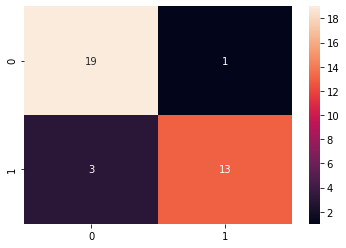

In [56]:
# checking the accuracy

accuracy_and_cofusion_matrix(KNN_data,X_test, y_test)

### Using Extra Tree Classifier

In [57]:
#from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

ET_heart_data  = ExtraTreesClassifier(n_estimators =500)
ET500_data = ET_heart_data.fit(X_train , y_train)

ET500_y_pred = ET_heart_data.predict(X_test)

test accuracy:  0.7222222222222222
precision:  0.6666666666666666
recall: 0.75
f1 score:  0.7058823529411765




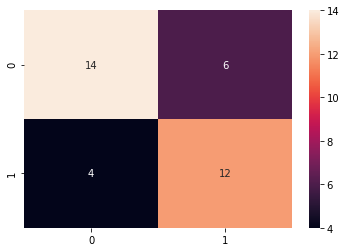

In [58]:
# checking the accuracy

accuracy_and_cofusion_matrix(ET500_data,X_test, y_test)

### Using XGBoost 

In [59]:
import xgboost as xgb
xgb_heart_data = xgb.XGBClassifier(n_estimators= 300)
xgb_data= xgb_heart_data.fit(X_train,y_train)

xgb_y_pred = xgb_heart_data.predict(X_test)

[22:26:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


test accuracy:  0.7222222222222222
precision:  0.6666666666666666
recall: 0.75
f1 score:  0.7058823529411765




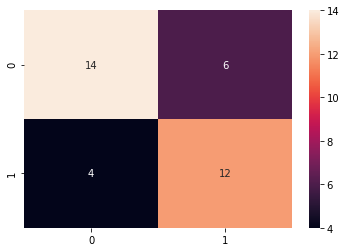

In [60]:
# checking the accuracy

accuracy_and_cofusion_matrix(xgb_data,X_test, y_test)

### Using Stochastic Gradient Descent

In [61]:
from sklearn.linear_model import SGDClassifier

sgd_heart_data = SGDClassifier(max_iter=800, tol=1e-4)
sgd_data=sgd_heart_data.fit(X_train,y_train)

sgd_y_pred = sgd_heart_data.predict(X_test)

test accuracy:  0.6944444444444444
precision:  0.631578947368421
recall: 0.75
f1 score:  0.6857142857142857




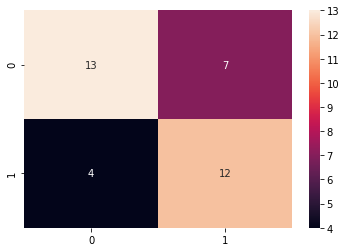

In [62]:
# checking the accuracy

accuracy_and_cofusion_matrix(sgd_data,X_test, y_test)

### Using Adaboost Classifier 

In [63]:
from sklearn.ensemble import AdaBoostClassifier
ada_heart_data = AdaBoostClassifier()
ada_data = ada_heart_data.fit(X_train,y_train)

ada_y_pred = ada_heart_data.predict(X_test)

test accuracy:  0.6944444444444444
precision:  0.6666666666666666
recall: 0.625
f1 score:  0.6451612903225806




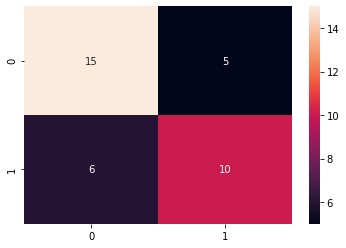

In [64]:
# checking the accuracy

accuracy_and_cofusion_matrix(ada_data,X_test, y_test)

### Using Gradient Boosting machine

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_heart_data = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbm_data= gbm_heart_data.fit(X_train,y_train)

gbm_y_pred = gbm_heart_data.predict(X_test)

test accuracy:  0.7777777777777778
precision:  0.75
recall: 0.75
f1 score:  0.75




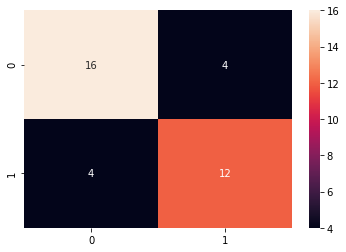

In [66]:
# checking the accuracy

accuracy_and_cofusion_matrix(gbm_data,X_test, y_test)

# 8. Model Evaluation

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC,Log_Loss
0,Random Forest,0.861111,0.923077,0.75,0.95,0.827586,0.85,4.797074


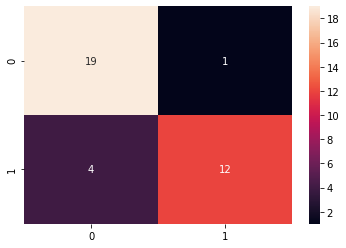

In [67]:
CM=confusion_matrix(y_test,RF_G_y_pred)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, RF_G_y_pred)
acc= accuracy_score(y_test, RF_G_y_pred)
roc=roc_auc_score(y_test, RF_G_y_pred)
prec = precision_score(y_test, RF_G_y_pred)
rec = recall_score(y_test, RF_G_y_pred)
f1 = f1_score(y_test, RF_G_y_pred)


model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log]],
               columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC','Log_Loss'])

model_results

In [68]:
data = {
                'Logistic Regression': LogReg_y_pred, 
                'SVM Linear' : svm_y_pred,
                'ANN MLPClassifier' : MLPC_y_pred,
                'Decision Tree Gini': DTC_G_y_pred, 
                'Decision Tree Entropy': DTC_E_y_pred, 
                'Random Forest Gini': RF_G_y_pred, 
                'Random Forest Entropy': RF_E_y_pred, 
                'KNN': KNN_y_pred,
                'EXtra tree classifier 500': ET500_y_pred,
                'XGBoost 300': xgb_y_pred,
                'Stochastic Gradient Descent' : sgd_y_pred, 
                'Adaboost': ada_y_pred, 
                'Gradient Boosting Machine' : gbm_y_pred
            }

models = pd.DataFrame(data) 
 
for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    loss_log = log_loss(y_test, models[column])
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])

    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc, loss_log]],
               columns = ['Model', 'Accuracy','Precision', 'Recall','Specificity', 'F1 Score','ROC','Log_Loss'])
    model_results = model_results.append(results, ignore_index = True).drop_duplicates()
    
model_results

,Model,Accuracy,Precision,Recall,Specificity,F1 Score,ROC,Log_Loss
0,Random Forest,0.861111,0.923077,0.7500,0.95,0.827586,0.85000,4.797074
1,Logistic Regression,0.861111,0.866667,0.8125,0.90,0.838710,0.85625,4.797097
2,SVM Linear,0.805556,0.764706,0.8125,0.80,0.787879,0.80625,6.715962
3,ANN MLPClassifier,0.666667,0.590909,0.8125,0.55,0.684211,0.68125,11.513125
4,Decision Tree Gini,0.694444,0.647059,0.6875,0.70,0.666667,0.69375,10.553648
5,Decision Tree Entropy,0.694444,0.647059,0.6875,0.70,0.666667,0.69375,10.553648
6,Random Forest Gini,0.861111,0.923077,0.7500,0.95,0.827586,0.85000,4.797074
7,Random Forest Entropy,0.833333,0.857143,0.7500,0.90,0.800000,0.82500,5.756507
8,KNN,0.888889,0.928571,0.8125,0.95,0.866667,0.88125,3.837664
9,EXtra tree classifier 500,0.722222,0.666667,0.7500,0.70,0.705882,0.72500,9.594238


From the above tabulation, KNN has the highest accuracy scores compare from the rest of the tested models


# 9. Feature Selection

In [69]:
#Checking Feature Importance of Random Forest Model
heart_data_feat = pd.DataFrame(RF_G_heart_data.feature_importances_, columns=['feature importance'] ,index=x.columns)
heart_data_feat.sort_values(by='feature importance', ascending=False)

,feature importance
thal_cat,0.215441
exercise_induced_angina,0.163651
oldpeak_eq_st_depression,0.132567
chest_pain_type,0.111631
max_heart_rate_achieved,0.096524
num_major_vessels,0.091844
slope_of_peak_exercise_st_segment,0.057244
sex,0.043922
age,0.032020
resting_blood_pressure,0.026998


In [70]:
#Using SelectKBest and chi2
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(x)

num_feats=13

chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = x.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

13 selected features


In [72]:
selected_features_df = pd.DataFrame({'Feature':list(x.columns),
                                     'Scores':chi_selector.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
11,exercise_induced_angina,24.757895
3,num_major_vessels,14.344533
0,slope_of_peak_exercise_st_segment,7.384091
8,sex,6.300403
7,oldpeak_eq_st_depression,5.270684
12,thal_cat,4.229268
2,chest_pain_type,4.154682
10,max_heart_rate_achieved,2.165485
5,resting_ekg_results,1.810714
9,age,0.240641


In [73]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

lr_selector = SelectFromModel(LogisticRegression(penalty="l2", solver='lbfgs'), max_features=num_feats)
lr_selector.fit(X_norm, y)

lr_support = lr_selector.get_support()
lr_feature = x.loc[:,lr_support].columns.tolist()
print(str(len(lr_feature)), 'selected features', '\n')
print("Logistic Regression Selected Features:")
print(str(lr_feature))

7 selected features 

Logistic Regression Selected Features:
['slope_of_peak_exercise_st_segment', 'chest_pain_type', 'num_major_vessels', 'oldpeak_eq_st_depression', 'sex', 'exercise_induced_angina', 'thal_cat']


In [74]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = x.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

13 selected features


In [75]:
#Recursive feature elimination with cross validation
from sklearn.feature_selection import RFECV

rfecv_heart_data = RFECV(estimator=LogReg_heart_data, step=1, cv=5, scoring='accuracy')
rfecv_heart_data.fit(X_norm, y)
print('Optimal number of features :', rfecv_heart_data.n_features_)
print('Best features :', x.columns[rfecv_heart_data.support_])

Optimal number of features : 9
Best features : Index(['slope_of_peak_exercise_st_segment', 'chest_pain_type',
       'num_major_vessels', 'resting_ekg_results', 'oldpeak_eq_st_depression',
       'sex', 'max_heart_rate_achieved', 'exercise_induced_angina',
       'thal_cat'],
      dtype='object')


In [76]:
#Randon Forest Feature Selection

rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, criterion='gini'), max_features=num_feats)
rf_selector.fit(x, y)

rf_support = rf_selector.get_support()
rf_feature = x.loc[:,rf_support].columns.tolist()
print(str(len(rf_feature)), 'selected features', '\n')
print("Random Forest Selected Features:")
print(str(rf_feature))

7 selected features 

Random Forest Selected Features:
['chest_pain_type', 'num_major_vessels', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'age', 'max_heart_rate_achieved', 'thal_cat']


### Feature Importance

<AxesSubplot:>

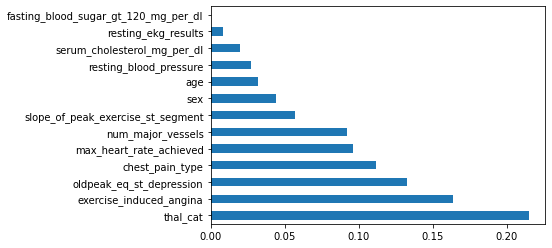

In [77]:
feat_importance = pd.Series(RF_G_heart_data.feature_importances_, index=x.columns)
feat_importance.nlargest(20).plot(kind='barh')

# 10. Heart Disease Prediction System Application

In [78]:
# Using KNN in testing the model prediction 


input_feat=(3,170,4,0,0,2,326,3.4,1,59,140,1,2) #random data picked from dataset 

input_feat_as_array = np.asarray(input_feat)

input_feat_reshape = input_feat_as_array.reshape(1 , -1)

prediction = KNN_heart_data.predict(input_feat_reshape)


if (prediction[0]== 0):
    print ("Result is: ", prediction, " The person does not have Heart Disease")
else:
    print ("Result is: ", prediction, " Unfortunately, the person is positive for Heart Disease")

Result is:  [1]  Unfortunately, the person is positive for Heart Disease


# 11. Conclusion

* K Nearest Neighbor (KNN) has the highest accuracy and precision scores compared to other tested ML models.
* Random Forest and Logistic Regression are second and third model that performs best.   

* Top 5 important features are:
1. thal
2. exercise_induce_angina
3. oldpeak_eq_st_depresion
4. chest_pain_type
5. max_heart_rate_achieved

